In [42]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.ticker as ticker, statsmodels.formula.api as smf
sns.set(style="whitegrid", font_scale=1.25)

data = pd.read_csv("vax.csv", parse_dates=["DATE"])
data["dayofyear"] = data["DATE"].dt.dayofyear
data

,DATE,TAS,NT,ACT,SA,WA,QLD,VIC,NSW,AUS,dayofyear
0,2021-03-23,1100.0,606,NaN,NaN,NaN,NaN,3369,NaN,5075,82
1,2021-03-24,1100.0,807,NaN,NaN,NaN,NaN,4362,NaN,6269,83
2,2021-03-25,1100.0,1019,NaN,NaN,2635.0,NaN,5709,NaN,10463,84
3,2021-03-26,2178.0,1254,NaN,NaN,3444.0,NaN,6797,NaN,13673,85
4,2021-03-27,2178.0,1429,NaN,NaN,4025.0,NaN,7874,NaN,15506,86
...,...,...,...,...,...,...,...,...,...,...,...
264,2021-12-12,413865.0,162493,359625.0,1265880.0,1751901.0,3492584.0,5211491,6418911.0,19262415,346
265,2021-12-13,414298.0,162589,359653.0,1267833.0,1754308.0,3495446.0,5212383,6419310.0,19271471,347
266,2021-12-14,415263.0,163331,359854.0,1273108.0,1762033.0,3528945.0,5217327,6422891.0,19329106,348
267,2021-12-15,416283.0,164045,360059.0,1278639.0,1770071.0,3552024.0,5221774,6426296.0,19375276,349


0.908728046378009
0.9863737338773186
0.9994906877836555


<AxesSubplot:xlabel='DATE', ylabel='AUS'>

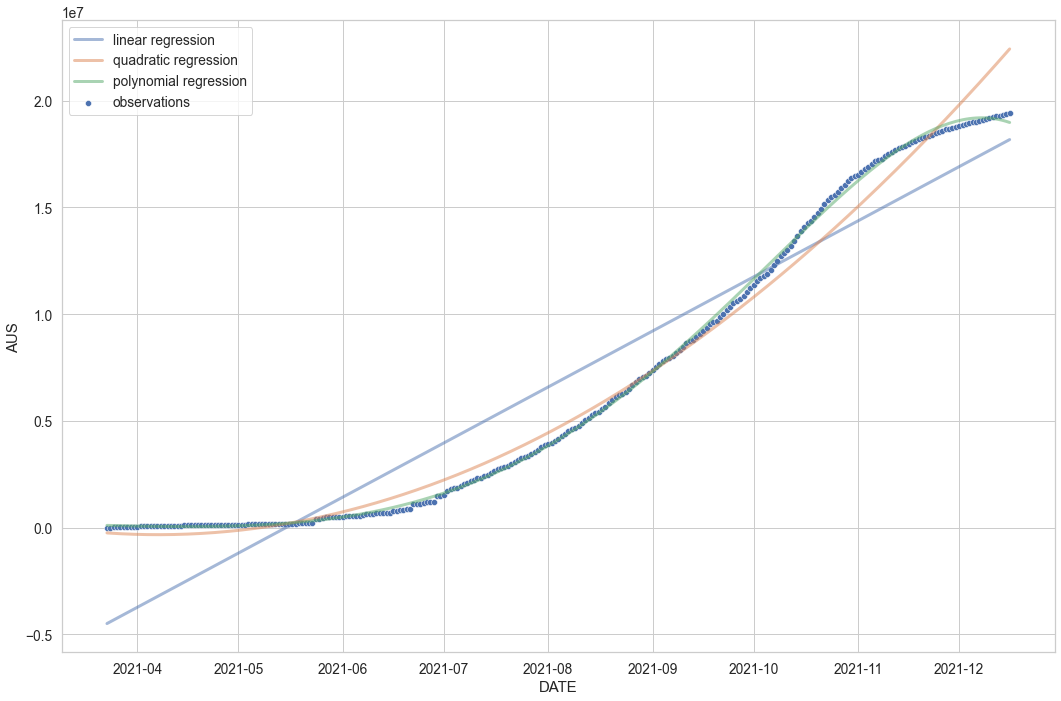

In [78]:
juris = "AUS"

model_linear = smf.ols(formula=f"{juris} ~ dayofyear", data=data)
model_quad = smf.ols(formula=f"{juris} ~ dayofyear + I(dayofyear**2)", data=data)
model_poly = smf.ols(formula=f"{juris} ~ dayofyear + I(dayofyear**2) + I(dayofyear**3) + I(dayofyear**4) + I(dayofyear**5) + I(dayofyear**6)", data=data)
results_linear = model_linear.fit()
results_quad = model_quad.fit()
results_poly = model_poly.fit()
print(results_linear.rsquared)
print(results_quad.rsquared)
print(results_poly.rsquared)

fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(15, 10)
)
sns.scatterplot(data=data, x="DATE", y=juris, ax=ax, label="observations")
sns.lineplot(data=data, x="DATE", y=results_linear.predict(data["dayofyear"]), ax=ax, alpha=.5, label="linear regression", lw=3)
sns.lineplot(data=data, x="DATE", y=results_quad.predict(data["dayofyear"]), ax=ax, alpha=.5, label="quadratic regression", lw=3)
sns.lineplot(data=data, x="DATE", y=results_poly.predict(data["dayofyear"]), ax=ax, alpha=.5, label="polynomial regression", lw=3)